# Interpolation Exercise 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
from scipy.interpolate import griddata

## Sparse 2d interpolation

In this example the values of a scalar field $f(x,y)$ are known at a very limited set of points in a square domain:

* The square domain covers the region $x\in[-5,5]$ and $y\in[-5,5]$.
* The values of $f(x,y)$ are zero on the boundary of the square at integer spaced points.
* The value of $f$ is known at a single interior point: $f(0,0)=1.0$.
* The function $f$ is not known at any other points.

Create arrays `x`, `y`, `f`:

* `x` should be a 1d array of the x coordinates on the boundary and the 1 interior point.
* `y` should be a 1d array of the y coordinates on the boundary and the 1 interior point.
* `f` should be a 1d array of the values of f at the corresponding x and y coordinates.

You might find that `np.hstack` is helpful.

In [3]:
x = np.zeros(41)
for n in range(0,11):
    x[n] = -5
for n in range(11,31,2):
    x[n] = (n-1)/2-9
    x[n+1] = (n-1)/2-9
for n in range(30,40):
    x[n] = 5
x[40] = 0

y = np.zeros(41)
for n in range(0,11):
    y[n] = n-5

for n in range(11,30,2):
    y[n] = -5
    y[n+1] = 5

for n in range(30,40):
    y[n] = n-34
y[40] = 0

f = np.zeros(41)
f[40] = 1
#-5*np.ones(5) + np.arange(-5,5) + 5*np.ones(5)
#y = np.arange(-5,1)
x, y, f

(array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -4., -4.,
        -3., -3., -2., -2., -1., -1.,  0.,  0.,  1.,  1.,  2.,  2.,  3.,
         3.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  0.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5., -5.,  5.,
        -5.,  5., -5.,  5., -5.,  5., -5.,  5., -5.,  5., -5.,  5., -5.,
         5., -5.,  5., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,
         5.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]))

The following plot should show the points on the boundary and the single point in the interior:

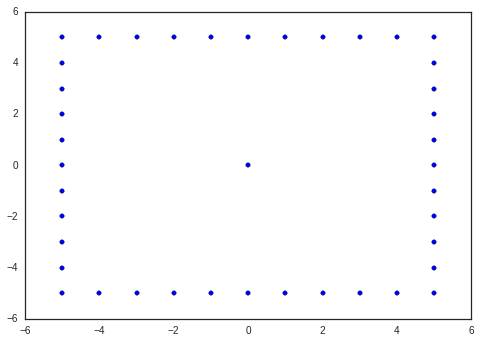

In [4]:
plt.scatter(x, y);

In [5]:
assert x.shape==(41,)
assert y.shape==(41,)
assert f.shape==(41,)
assert np.count_nonzero(f)==1

Use `meshgrid` and `griddata` to interpolate the function $f(x,y)$ on the entire square domain:

* `xnew` and `ynew` should be 1d arrays with 100 points between $[-5,5]$.
* `Xnew` and `Ynew` should be 2d versions of `xnew` and `ynew` created by `meshgrid`.
* `Fnew` should be a 2d array with the interpolated values of $f(x,y)$ at the points (`Xnew`,`Ynew`).
* Use cubic spline interpolation.

In [20]:
xnew = np.linspace(-5,5,10)
ynew = np.linspace(-5,5,10)
Xnew,Ynew = np.meshgrid(xnew,ynew)

Fnew = griddata((x, y), f, (Xnew, Ynew), method='cubic')
Xnew

array([[-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778

In [9]:
# assert xnew.shape==(100,)
# assert ynew.shape==(100,)
# assert Xnew.shape==(100,100)
# assert Ynew.shape==(100,100)
# assert Fnew.shape==(100,100)

Plot the values of the interpolated scalar field using a contour plot. Customize your plot to make it effective and beautiful.

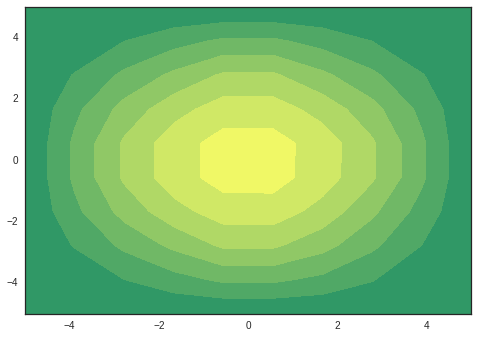

In [10]:
plt.contourf(Xnew,Ynew,Fnew, cmap = 'summer')

In [ ]:
assert True # leave this to grade the plot